<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/S%26P_500_Stock__dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Standard and poor's dataset using APPLE data to apply Time series

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/all_stocks_5yr.csv')

In [5]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.duplicated().sum()

0

<ipython-input-13-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

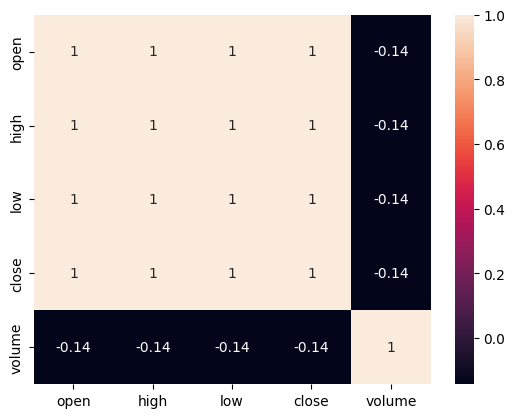

In [13]:
sns.heatmap(df.corr(), annot=True)

In [15]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [16]:
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619029 non-null  float64       
 3   low     619029 non-null  float64       
 4   close   619029 non-null  float64       
 5   volume  619029 non-null  int64         
 6   Name    619029 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 37.8+ MB


In [18]:
df['Name'].value_counts()

AAL     1259
NOV     1259
NLSN    1259
NKE     1259
NI      1259
        ... 
DXC      215
BHGE     152
BHF      142
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

In [19]:
df.set_index('Name', inplace=True)
df.sample(2)

,date,open,high,low,close,volume
Name,,,,,,
KHC,2015-07-31,79.94,79.94,78.865,79.47,2685520
HOLX,2013-09-25,20.43,20.55,20.280,20.33,2826128


In [20]:
df1 = df.loc['AAPL']
df1.sample(2)

,date,open,high,low,close,volume
Name,,,,,,
AAPL,2015-10-26,118.08,118.13,114.92,115.28,66333781
AAPL,2015-10-20,111.34,114.17,110.82,113.77,48967763


In [21]:
df2 = df1.reset_index()['close']

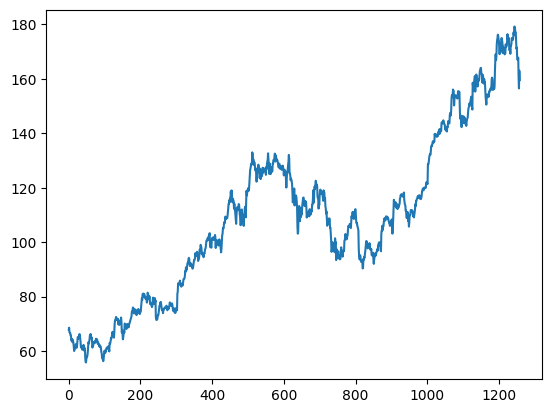

In [23]:
plt.plot(df2)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [29]:
df2

array([[0.0977103 ],
       [0.103438  ],
       [0.08951884],
       ...,
       [0.81558288],
       [0.86855117],
       [0.84028522]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [ ]:
training_size,test_size

(818, 441)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(717, 100)
(717,)
(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 320ms/step - loss: 0.0345 - val_loss: 0.0827
Epoch 2/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0075 - val_loss: 0.0092
Epoch 3/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0035 - val_loss: 0.0135
Epoch 4/100
12/12 [==============================] - 3s 294ms/step - loss: 0.0018 - val_loss: 0.0115
Epoch 5/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0016 - val_loss: 0.0093
Epoch 6/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0017 - val_loss: 0.0058
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0015 - val_loss: 0.0055
Epoch 8/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 3s 293ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 10/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0013 - val_l

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 36ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

100.48828049795281

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

143.71340845350255

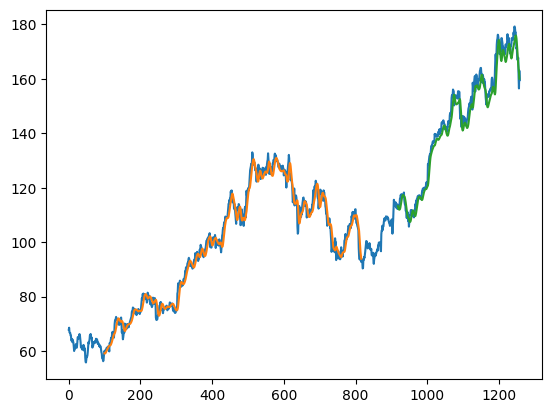

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()